# Big data Project - Spark Analytics

In [ ]:
California Housing dataset - Source : http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

In [ ]:
Objective - Build a model to predict the housing price

In [1]:
import  findspark
findspark.init()
import pyspark as ps
import warnings
from pyspark.sql import SQLContext

In [ ]:
#Setting up the spark context

In [2]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setMaster("local").setAppName("project")
sc = SparkContext(conf = conf)

In [ ]:
#Try out few RDD operations

In [3]:
rdd1 = sc.parallelize([('a',7),('a',2),('b',2)])
rdd2 = sc.parallelize([("a",["x","y","z"]), ("b",["p", "r"])])
rdd3 = sc.parallelize(range(100))
rdd1.reduce(lambda a,b: a+b)

('a', 7, 'a', 2, 'b', 2)

In [4]:
# Import SparkSession
from pyspark.sql import SparkSession

# Build the SparkSession
spark = SparkSession.builder \
   .master("local") \
   .appName("Linear Regression Model") \
   .getOrCreate()
   
sc = spark.sparkContext

In [5]:
# Load in the data
rdd = sc.textFile('C:/Users/Ramesh Narayanan/Downloads/cal_housing/CaliforniaHousing/cal_housing.data')

# Load in the header
header = sc.textFile('C:/Users/Ramesh Narayanan/Downloads/cal_housing/CaliforniaHousing/cal_housing.domain')


In [6]:
header.collect()


['longitude: continuous.',
 'latitude: continuous.',
 'housingMedianAge: continuous. ',
 'totalRooms: continuous. ',
 'totalBedrooms: continuous. ',
 'population: continuous. ',
 'households: continuous. ',
 'medianIncome: continuous. ',
 'medianHouseValue: continuous. ']

In [7]:
rdd.take(2)

['-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000',
 '-122.220000,37.860000,21.000000,7099.000000,1106.000000,2401.000000,1138.000000,8.301400,358500.000000']

In [8]:
# Split lines on commas
rdd = rdd.map(lambda line: line.split(","))

# Inspect the first 2 lines 
rdd.take(2)

[['-122.230000',
  '37.880000',
  '41.000000',
  '880.000000',
  '129.000000',
  '322.000000',
  '126.000000',
  '8.325200',
  '452600.000000'],
 ['-122.220000',
  '37.860000',
  '21.000000',
  '7099.000000',
  '1106.000000',
  '2401.000000',
  '1138.000000',
  '8.301400',
  '358500.000000']]

In [9]:
# Import the necessary modules 
from pyspark.sql import Row

# Map the RDD to a DF
df = rdd.map(lambda line: Row(longitude=line[0], 
                              latitude=line[1], 
                              housingMedianAge=line[2],
                              totalRooms=line[3],
                              totalBedRooms=line[4],
                              population=line[5], 
                              households=line[6],
                              medianIncome=line[7],
                              medianHouseValue=line[8])).toDF()

In [10]:
df.show()

+-----------+----------------+---------+-----------+----------------+------------+-----------+-------------+-----------+
| households|housingMedianAge| latitude|  longitude|medianHouseValue|medianIncome| population|totalBedRooms| totalRooms|
+-----------+----------------+---------+-----------+----------------+------------+-----------+-------------+-----------+
| 126.000000|       41.000000|37.880000|-122.230000|   452600.000000|    8.325200| 322.000000|   129.000000| 880.000000|
|1138.000000|       21.000000|37.860000|-122.220000|   358500.000000|    8.301400|2401.000000|  1106.000000|7099.000000|
| 177.000000|       52.000000|37.850000|-122.240000|   352100.000000|    7.257400| 496.000000|   190.000000|1467.000000|
| 219.000000|       52.000000|37.850000|-122.250000|   341300.000000|    5.643100| 558.000000|   235.000000|1274.000000|
| 259.000000|       52.000000|37.850000|-122.250000|   342200.000000|    3.846200| 565.000000|   280.000000|1627.000000|
| 193.000000|       52.000000|37

In [11]:
# Print the data types of all `df` columns
# df.dtypes

# Print the schema of `df`
df.printSchema()

root
 |-- households: string (nullable = true)
 |-- housingMedianAge: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- medianHouseValue: string (nullable = true)
 |-- medianIncome: string (nullable = true)
 |-- population: string (nullable = true)
 |-- totalBedRooms: string (nullable = true)
 |-- totalRooms: string (nullable = true)



In [12]:
# Import all from `sql.types`
from pyspark.sql.types import *

# Write a custom function to convert the data type of DataFrame columns
def convertColumn(df, names, newType):
  for name in names: 
     df = df.withColumn(name, df[name].cast(newType))
  return df 

# Assign all column names to `columns`
columns = ['households', 'housingMedianAge', 'latitude', 'longitude', 'medianHouseValue', 'medianIncome', 'population', 'totalBedRooms', 'totalRooms']

# Conver the `df` columns to `FloatType()`
df = convertColumn(df, columns, FloatType())

In [13]:
df.printSchema()

root
 |-- households: float (nullable = true)
 |-- housingMedianAge: float (nullable = true)
 |-- latitude: float (nullable = true)
 |-- longitude: float (nullable = true)
 |-- medianHouseValue: float (nullable = true)
 |-- medianIncome: float (nullable = true)
 |-- population: float (nullable = true)
 |-- totalBedRooms: float (nullable = true)
 |-- totalRooms: float (nullable = true)



In [14]:
df.select('population','totalBedRooms').show(10)

+----------+-------------+
|population|totalBedRooms|
+----------+-------------+
|     322.0|        129.0|
|    2401.0|       1106.0|
|     496.0|        190.0|
|     558.0|        235.0|
|     565.0|        280.0|
|     413.0|        213.0|
|    1094.0|        489.0|
|    1157.0|        687.0|
|    1206.0|        665.0|
|    1551.0|        707.0|
+----------+-------------+
only showing top 10 rows



In [15]:
df.groupBy("housingMedianAge").count().sort("housingMedianAge",ascending=False).show()

+----------------+-----+
|housingMedianAge|count|
+----------------+-----+
|            52.0| 1273|
|            51.0|   48|
|            50.0|  136|
|            49.0|  134|
|            48.0|  177|
|            47.0|  198|
|            46.0|  245|
|            45.0|  294|
|            44.0|  356|
|            43.0|  353|
|            42.0|  368|
|            41.0|  296|
|            40.0|  304|
|            39.0|  369|
|            38.0|  394|
|            37.0|  537|
|            36.0|  862|
|            35.0|  824|
|            34.0|  689|
|            33.0|  615|
+----------------+-----+
only showing top 20 rows



In [16]:
df.describe().show()

+-------+-----------------+------------------+-----------------+-------------------+------------------+------------------+------------------+-----------------+------------------+
|summary|       households|  housingMedianAge|         latitude|          longitude|  medianHouseValue|      medianIncome|        population|    totalBedRooms|        totalRooms|
+-------+-----------------+------------------+-----------------+-------------------+------------------+------------------+------------------+-----------------+------------------+
|  count|            20640|             20640|            20640|              20640|             20640|             20640|             20640|            20640|             20640|
|   mean|499.5396802325581|28.639486434108527|35.63186143109965|-119.56970444871473|206855.81690891474|3.8706710030346416|1425.4767441860465|537.8980135658915|2635.7630813953488|
| stddev|382.3297528316098| 12.58555761211163|2.135952380602968|  2.003531742932898|115395.61587441359|1.

# EXPLORATORY DATA ANALYSIS

In [40]:
type(dfraw)

pandas.core.frame.DataFrame

In [17]:
dfraw=df.toPandas()

In [18]:
type(dfraw)

pandas.core.frame.DataFrame

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
% matplotlib inline

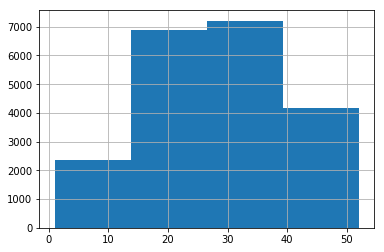

In [20]:
dfraw['housingMedianAge'].hist(bins=4)

In [ ]:
# Majority of the houses are between 15 and 45 years old

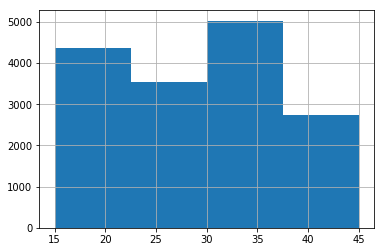

In [21]:
dfraw['housingMedianAge'].hist(bins=4,range=[15,45])

In [ ]:
#Maximum houses are aged 30 to 35 years

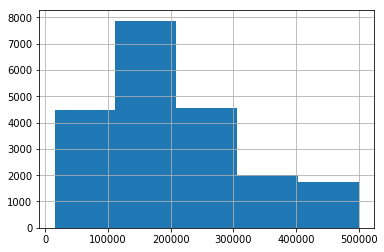

In [22]:
dfraw['medianHouseValue'].hist(bins=5)

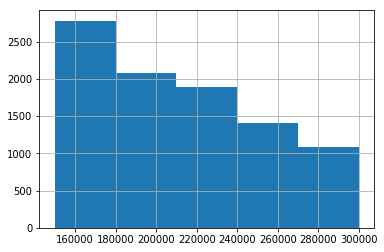

In [73]:
dfraw['medianHouseValue'].hist(bins=5, range=[150000,300000])

In [ ]:
#Most of the houses are between 160000 and 180000

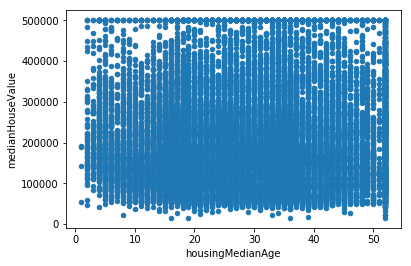

In [23]:
dfraw.plot.scatter('housingMedianAge','medianHouseValue')

In [ ]:
#The relation between Age and Housing value seems spread out. A clear pattern is not derived

# Correlation of Features

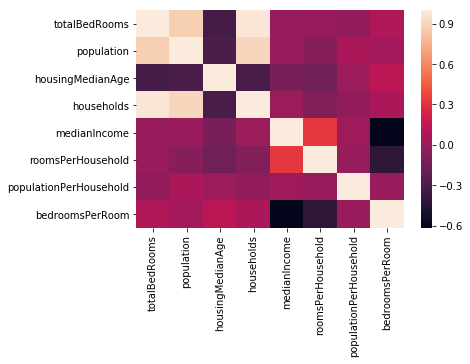

In [71]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation
import pandas as pd
from pyspark.mllib.stat import Statistics


corr_mat=Statistics.corr(features, method="pearson")

pd.set_option('display.max_columns', 50)


col_names = [ 
              "totalBedRooms", 
              "population",
              "housingMedianAge",
              "households", 
              "medianIncome", 
              "roomsPerHousehold", 
            "populationPerHousehold", 
              "bedroomsPerRoom"]
corr_df = pd.DataFrame(
                    corr_mat, 
                    index=col_names, 
                    columns=col_names)

import seaborn as sns
%matplotlib inline
sns.heatmap(corr_df, 
        xticklabels=corr_df.columns,
        yticklabels=corr_df.columns)

Histogram count - Using RDD

In [24]:
# Doing the heavy lifting in Spark. We could leverage the `histogram` function from the RDD api

medianHouseValue_histogram = df.select('medianHouseValue').rdd.flatMap(lambda x: x).histogram(8)

# Loading the Computed Histogram into a Pandas Dataframe for plotting

medianHouseValue_histogram

hist_table=pd.DataFrame(list(medianHouseValue_histogram))

In [25]:
hist_table

,0,1,2,3,4,5,6,7,8
0,14999.0,75624.25,136249.5,196874.75,257500.0,318125.25,378750.5,439375.75,500001.0
1,1698.0,4669.00,5341.0,3450.00,2034.0,1409.00,674.0,1365.00,NaN


# FEATURE ENGINEERING

In [26]:
# Import all from `sql.functions` 
from pyspark.sql.functions import *

# Adjust the values of `medianHouseValue`
df = df.withColumn("medianHouseValue", col("medianHouseValue")/100000)

# Show the first 2 lines of `df`
df.take(2)

[Row(households=126.0, housingMedianAge=41.0, latitude=37.880001068115234, longitude=-122.2300033569336, medianHouseValue=4.526, medianIncome=8.325200080871582, population=322.0, totalBedRooms=129.0, totalRooms=880.0),
 Row(households=1138.0, housingMedianAge=21.0, latitude=37.86000061035156, longitude=-122.22000122070312, medianHouseValue=3.585, medianIncome=8.301400184631348, population=2401.0, totalBedRooms=1106.0, totalRooms=7099.0)]

In [27]:
# Import all from `sql.functions` if you haven't yet
from pyspark.sql.functions import *

# Divide `totalRooms` by `households`
roomsPerHousehold = df.select(col("totalRooms")/col("households"))

# Divide `population` by `households`
populationPerHousehold = df.select(col("population")/col("households"))

# Divide `totalBedRooms` by `totalRooms`
bedroomsPerRoom = df.select(col("totalBedRooms")/col("totalRooms"))

# Add the new columns to `df`
df = df.withColumn("roomsPerHousehold", col("totalRooms")/col("households")) \
   .withColumn("populationPerHousehold", col("population")/col("households")) \
   .withColumn("bedroomsPerRoom", col("totalBedRooms")/col("totalRooms"))
   
# Inspect the result
df.first()

Row(households=126.0, housingMedianAge=41.0, latitude=37.880001068115234, longitude=-122.2300033569336, medianHouseValue=4.526, medianIncome=8.325200080871582, population=322.0, totalBedRooms=129.0, totalRooms=880.0, roomsPerHousehold=6.984126984126984, populationPerHousehold=2.5555555555555554, bedroomsPerRoom=0.14659090909090908)

In [28]:
# Re-order and select columns
df = df.select("medianHouseValue", 
              "totalBedRooms", 
              "population",
              "housingMedianAge",
              "households", 
              "medianIncome", 
              "roomsPerHousehold", 
            "populationPerHousehold", 
              "bedroomsPerRoom")

In [29]:
df.take(2)


[Row(medianHouseValue=4.526, totalBedRooms=129.0, population=322.0, housingMedianAge=41.0, households=126.0, medianIncome=8.325200080871582, roomsPerHousehold=6.984126984126984, populationPerHousehold=2.5555555555555554, bedroomsPerRoom=0.14659090909090908),
 Row(medianHouseValue=3.585, totalBedRooms=1106.0, population=2401.0, housingMedianAge=21.0, households=1138.0, medianIncome=8.301400184631348, roomsPerHousehold=6.238137082601054, populationPerHousehold=2.109841827768014, bedroomsPerRoom=0.15579659106916466)]

In [30]:
import pyspark.mllib
import pyspark.mllib.regression
from pyspark.mllib.regression import LabeledPoint
from pyspark.sql.functions import *

In [31]:
df.printSchema()

root
 |-- medianHouseValue: double (nullable = true)
 |-- totalBedRooms: float (nullable = true)
 |-- population: float (nullable = true)
 |-- housingMedianAge: float (nullable = true)
 |-- households: float (nullable = true)
 |-- medianIncome: float (nullable = true)
 |-- roomsPerHousehold: double (nullable = true)
 |-- populationPerHousehold: double (nullable = true)
 |-- bedroomsPerRoom: double (nullable = true)



In [32]:
# Import `DenseVector`
from pyspark.ml.linalg import DenseVector

# Define the `input_data` 
input_data = df.rdd.map(lambda x: (x[0], DenseVector(x[1:])))

# Replace `df` with the new DataFrame
dfnew = spark.createDataFrame(input_data, ["label", "features"])

In [33]:
# Import `StandardScaler` 
from pyspark.ml.feature import StandardScaler

# Initialize the `standardScaler`
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")

# Fit the DataFrame to the scaler
scaler = standardScaler.fit(dfnew)

# Transform the data in `df` with the scaler
scaled_df = scaler.transform(dfnew)

# Inspect the result
scaled_df.take(2)

[Row(label=4.526, features=DenseVector([129.0, 322.0, 41.0, 126.0, 8.3252, 6.9841, 2.5556, 0.1466]), features_scaled=DenseVector([0.3062, 0.2843, 3.2577, 0.3296, 4.3821, 2.8228, 0.2461, 2.5264])),
 Row(label=3.585, features=DenseVector([1106.0, 2401.0, 21.0, 1138.0, 8.3014, 6.2381, 2.1098, 0.1558]), features_scaled=DenseVector([2.6255, 2.1202, 1.6686, 2.9765, 4.3696, 2.5213, 0.2031, 2.6851]))]

In [34]:
# Split the data into train and test sets
train_data, test_data = scaled_df.randomSplit([.8,.2],seed=1234)

# Model Building - Linear Regression

In [35]:
# Import `LinearRegression`
from pyspark.ml.regression import LinearRegression

# Initialize `lr`
lr = LinearRegression(labelCol="label", maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the data to the model
linearModel = lr.fit(train_data)

In [36]:
# Generate predictions
predicted = linearModel.transform(test_data)

# Extract the predictions and the "known" correct labels
predictions = predicted.select("prediction").rdd.map(lambda x: x[0])
labels = predicted.select("label").rdd.map(lambda x: x[0])

# Zip `predictions` and `labels` into a list
predictionAndLabel = predictions.zip(labels).collect()

# Print out first 5 instances of `predictionAndLabel` 
predictionAndLabel[:5]

[(1.1334773624297645, 0.14999),
 (1.4481535478019212, 0.14999),
 (1.5710638668261874, 0.14999),
 (1.7494839235010846, 0.283),
 (1.2433776049321865, 0.366)]

In [37]:
# Coefficients for the model
linearModel.coefficients

DenseVector([0.0, 0.0, 0.0, 0.0, 0.2798, 0.0, 0.0, 0.0])

In [38]:
# Intercept for the model
linearModel.intercept

0.9835116408805337

# Model Evaluation - Linear Regression

In [39]:
# Get the RMSE
linearModel.summary.rootMeanSquaredError

0.8764824551960556

In [40]:
# Get the R2
linearModel.summary.r2

0.42288958945691024

# RANDOM FORREST

In [41]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

In [42]:
# Re-order and select columns
df4 = df.select("medianHouseValue",
               "totalBedRooms", 
              "population",
              "housingMedianAge",
              "households", 
              "medianIncome", 
              "roomsPerHousehold", 
            "populationPerHousehold", 
              "bedroomsPerRoom",)

rfModel = model.stages[1]
print(rfModel)

# RANDOM FOREST REGRESSION

 Convert the dataframe into Pandas

In [45]:
df4.toPandas().head()

,medianHouseValue,totalBedRooms,population,housingMedianAge,households,medianIncome,roomsPerHousehold,populationPerHousehold,bedroomsPerRoom
0,4.526,129.0,322.0,41.0,126.0,8.3252,6.984127,2.555556,0.146591
1,3.585,1106.0,2401.0,21.0,1138.0,8.3014,6.238137,2.109842,0.155797
2,3.521,190.0,496.0,52.0,177.0,7.2574,8.288136,2.802260,0.129516
3,3.413,235.0,558.0,52.0,219.0,5.6431,5.817352,2.547945,0.184458
4,3.422,280.0,565.0,52.0,259.0,3.8462,6.281853,2.181467,0.172096


Create a feature rdd with all the dependent variables

In [46]:
features=df4.rdd.map(lambda row: row[1:])

In [47]:
features.take(1)

[(129.0,
  322.0,
  41.0,
  126.0,
  8.325200080871582,
  6.984126984126984,
  2.5555555555555554,
  0.14659090909090908)]

In [48]:
type(features)

pyspark.rdd.PipelinedRDD

In [49]:
from pyspark.mllib.util import MLUtils
from pyspark.mllib.linalg import Vectors
from pyspark.ml.linalg import Vectors
from pyspark.mllib.feature import StandardScaler

Since different columns in the dataset are on a different scale, the effect of each column might not be appropriate. 
So standardize and scale them

In [50]:
standardizer = StandardScaler()
model = standardizer.fit(features)
features_transform = model.transform(features)

In [51]:
features_transform.take(2)

[DenseVector([0.3062, 0.2843, 3.2577, 0.3296, 4.3821, 2.8228, 0.2461, 2.5264]),
 DenseVector([2.6255, 2.1202, 1.6686, 2.9765, 4.3696, 2.5213, 0.2031, 2.6851])]

Create the Label RDD, with the dependent variable

In [52]:
labels=df4.rdd.map(lambda row: row[0])
labels.take(2)

[4.526, 3.585]

Create a dense vector that has both the label and the features

In [53]:
transformedData=labels.zip(features_transform)
transformedData.take(2)

[(4.526,
  DenseVector([0.3062, 0.2843, 3.2577, 0.3296, 4.3821, 2.8228, 0.2461, 2.5264])),
 (3.585,
  DenseVector([2.6255, 2.1202, 1.6686, 2.9765, 4.3696, 2.5213, 0.2031, 2.6851]))]

Create Labeled Rdd that labels the dependent variable column.

In [54]:
transformedData = transformedData.map(lambda row : LabeledPoint(row[0],row[1]))
transformedData.take(5)
type(transformedData)

pyspark.rdd.PipelinedRDD

Create Training Testing split data 

In [55]:
trainingData, testingData = transformedData.randomSplit([.8,.2])

In [56]:
from pyspark.mllib.tree import RandomForest, RandomForestModel
from pyspark.mllib.util import MLUtils

# Build the Model - Random Forest

In [57]:
model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo={},
                                        numTrees=3, featureSubsetStrategy="auto",
                                        impurity='variance', maxDepth=4, maxBins=32)

In [58]:
predictions = model.predict(testingData.map(lambda x: x.features))

In [59]:
labelsAndPredictions = testingData.map(lambda lp: lp.label).zip(predictions)

In [60]:
labelsAndPredictions.take(2)

[(4.526, 4.162449417384814), (2.414, 2.021335390424516)]

# Model Evaluation

In [61]:
trainingMSE = labelsAndPredictions.map(lambda lp: (lp[0] - lp[1]) * (lp[0] - lp[1])).sum() /\
    float(trainingData.count())

In [62]:
testMSE = labelsAndPredictions.map(lambda lp: (lp[0] - lp[1]) * (lp[0] - lp[1])).sum() /\
    float(testingData.count())

In [63]:
print('Train Mean Squared Error = ' + str(trainingMSE))
print('Test Mean Squared Error = ' + str(testMSE))

Train Mean Squared Error = 0.14439079329980267
Test Mean Squared Error = 0.5835588827402381


# Build thhe Model - Gradient Boosting Trees

In [64]:
from pyspark.mllib.tree import GradientBoostedTrees, GradientBoostedTreesModel
from pyspark.mllib.util import MLUtils


# Gradient Boosting Trees- With 3 iterations

In [65]:
model = GradientBoostedTrees.trainRegressor(trainingData,
                                            categoricalFeaturesInfo={}, numIterations=3)

In [66]:
predictions = model.predict(testingData.map(lambda x: x.features))
labelsAndPredictions = testingData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(lambda lp: (lp[0] - lp[1]) * (lp[0] - lp[1])).sum() /\
    float(testingData.count())

# Model Evaluation 

In [67]:
print('Test Mean Squared Error = ' + str(testMSE))
print('Learned regression GBT model:')
print(model.toDebugString())

Test Mean Squared Error = 0.5834088412065996
Learned regression GBT model:
TreeEnsembleModel regressor with 3 trees

  Tree 0:
    If (feature 4 <= 2.6342472031401423)
     If (feature 4 <= 1.6178359815913521)
      If (feature 7 <= 4.501048722081498)
       Predict: 1.1958663296597984
      Else (feature 7 > 4.501048722081498)
       Predict: 1.6797502214732773
     Else (feature 4 > 1.6178359815913521)
      If (feature 6 <= 0.2287995117082654)
       Predict: 2.7737749496855333
      Else (feature 6 > 0.2287995117082654)
       Predict: 1.867874236723496
    Else (feature 4 > 2.6342472031401423)
     If (feature 4 <= 3.6390519348355124)
      If (feature 6 <= 0.2490524015281822)
       Predict: 3.550046995884774
      Else (feature 6 > 0.2490524015281822)
       Predict: 2.6541636021505384
     Else (feature 4 > 3.6390519348355124)
      If (feature 4 <= 4.301429857571639)
       Predict: 3.863115968063868
      Else (feature 4 > 4.301429857571639)
       Predict: 4.624141503906259


# Gradient Boosting Trees- 100 iterations

In [68]:
model = GradientBoostedTrees.trainRegressor(trainingData,
                                            categoricalFeaturesInfo={}, numIterations=100)

In [69]:
predictions = model.predict(testingData.map(lambda x: x.features))
labelsAndPredictions = testingData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(lambda lp: (lp[0] - lp[1]) * (lp[0] - lp[1])).sum() /\
    float(testingData.count())

In [70]:
print('Test Mean Squared Error = ' + str(testMSE))
print('Learned regression GBT model:')

Test Mean Squared Error = 0.4282656468134363
Learned regression GBT model:


As the Number of Iterasion increase, the model works better and the error in the model decreases.

# Summary

#California Dataset is taken.
The dataset is analysed. An exploratory data analysis is done
Linear model is ran to predict the housing value based on other parameters. But the model does not work well.
So we use ensemble complex models such as Random forrest and Gradient Boosting trees with different iteration combinations 
These models can be used as a direction to derive the value of a property while a business is done on that.

In [ ]:
spark.stop()